<center>
    <h1> Wprowadzenie do transformacji PCA </h1>
</center>


Wygenerować dane (1000 punktów) na płaszczyźnie z 2-wymiarowego rozkładu normalnego o niediagonalnej macierzy kowariancji i narysować je.

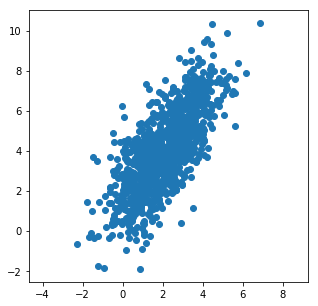

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

n = 1000
mean = [2, 4]
A=np.array([[1,1],[0,2]])
cov = np.matmul(A, np.transpose(A)) #cov = A*A^T
X = np.random.multivariate_normal(mean, cov, n)
# standaryzacja dopiero poniżej

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])

plt.axis('equal')
plt.show()

* Pytamy się, które współrzędne są najważniejsze - opisują najwięcej informacji o naszych danych. 

Pierwszym krokiem jest normalizacja danych. Jako, że atrybut 1 może mieć inną skalę niż atrybut 2, konieczne jest ujednolicenie skal. Dokunujemy tego w dwóch krokach:

 * przesuwamy dane do środka układu współrzędnych

 * normalizujemy dane (dzielimy każdą współrzędną przez średnią długość wszyskich punktów)

Możemy to zrobić używając scalera.

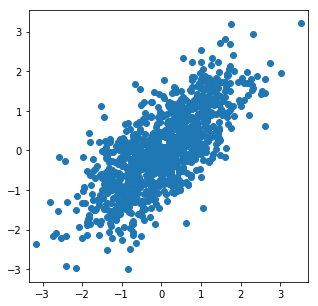

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X_std[:, 0], X_std[:, 1])
plt.axis('equal')
plt.show()
# wykres po przeskalowaniu

Wygląd naszych danych jest niemal identyczny jak poprzednio. Jedyna zmiana polega na zmianie skali. Tak naprawdę odchylenie standardowe na każdym atrybucie wynosi 1. 


# Zad 

Proszę sprawdzić, jakie jest odchylenie standardowe na każdej współrzędnej.

In [9]:
np.cov(X_std.T)
# kolumna jest odwrócona wiec trzeba przetransponować

array([[1.001001  , 0.72055337],
       [0.72055337, 1.001001  ]])



Aby wyznaczyć kierunki decydujące o kształcie naszych danych, należy policzyć wektory i wartości wałasne z macierzy kowariancji.

**Definicja: **
Dla macierzy kwadratowej $A$, wektor własny $v$ i wartość własna $\lambda$ spełnia: 
$$
Av = \lambda v
$$

Zilustrujemy powyższe wielkości na przykładzie.

In [10]:
cov_mat = np.cov(X_std.T)
print('Macierz kowariancji: \n%s' %cov_mat)

e_values, e_vectors = np.linalg.eigh(cov_mat)

print('Eigenvectors \n%s' %e_vectors)
print('\nEigenvalues \n%s' %e_values)

Macierz kowariancji: 
[[1.001001   0.72055337]
 [0.72055337 1.001001  ]]
Eigenvectors 
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]

Eigenvalues 
[0.28044763 1.72155437]


# Zad
Narysujmy oba wektory na naszych danych przeskalowane przez odpowiadające im wartości własne.

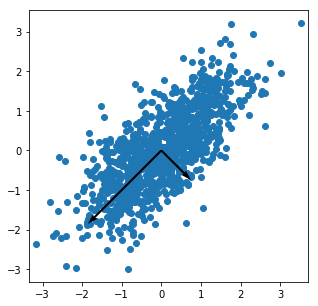

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.scatter(X_std[:, 0], X_std[:, 1])

# ax.set_xlim([-10,10])
# ax.set_ylim([-10,10])

#plot eigen vectors

soa =np.array( [ [0,0,2*np.sqrt(e_values[1])*e_vectors[0,1],2*np.sqrt(e_values[1])*e_vectors[1,1]],
                 [0,0,2*np.sqrt(e_values[0])*e_vectors[0,0],2*np.sqrt(e_values[0])*e_vectors[1,0]]] )

X1,Y1,U1,V1 = zip(*soa)
ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=1)
plt.axis('equal')
plt.show()

## Co zrobiliśmy (trochę matematyki)? 

Przedstawiliśmy macierz kowariancji $\Sigma$ w postaci iloczynu:
$$
\Sigma = V S V^T
$$
gdzie $V$ to macierz zawierająca na kolumnach wektory własne, a $S$ to macierz diagonalna, która na przekątnej ma wartości własne.

# Zad. 

Zweryfikować powyższe stwierdzenie tzn. sprawdzić, że powyższy iloczyn rzeczywiście daje macierz kowariancji.

In [16]:
print("Iloczyn macierzy: \n", np.dot(np.dot(e_vectors, np.diag(e_values)), e_vectors.T))
print("Macierz kowariancji: \n", cov_mat)

Iloczyn macierzy: 
 [[1.001001   0.72055337]
 [0.72055337 1.001001  ]]
Macierz kowariancji: 
 [[1.001001   0.72055337]
 [0.72055337 1.001001  ]]


# Zad 
Wykonajmy tą procedurę za pomoca funkcji
```python
from sklearn.decomposition import PCA
```

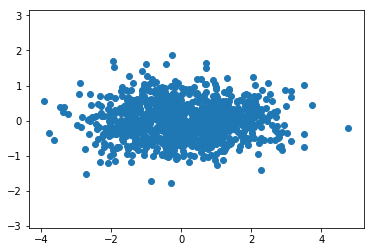

In [17]:
from sklearn.decomposition import PCA
model = PCA()

pca_features = model.fit_transform(X_std) # dwa wymiary, wiec rzutowanie jest na dwa wymiary

xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()



# Zad 
Wykonajmy test korelacji

In [18]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(xs, ys)
print(correlation)
print(pvalue)

-3.198810241149604e-17
1.0


### Wizualizacja wartości "na nowych wymiarach"

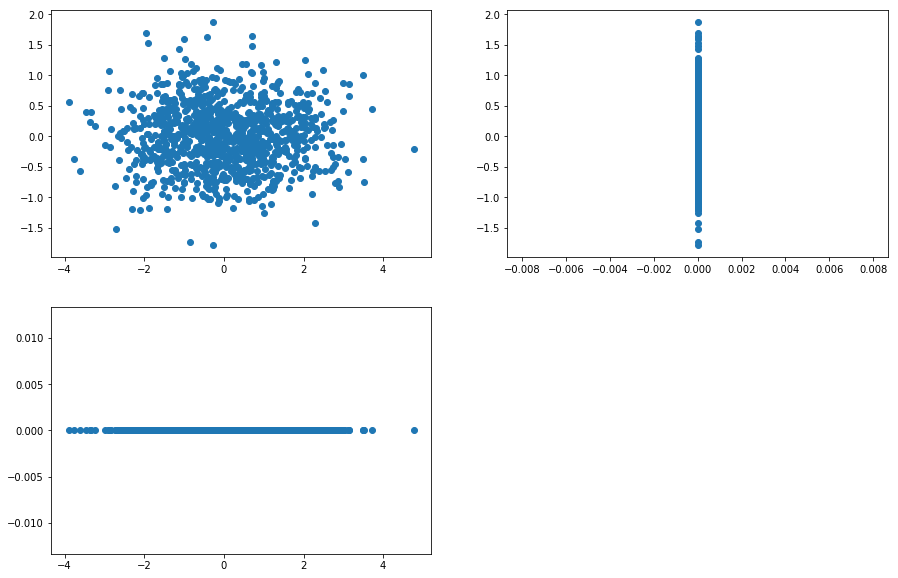

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(xs, ys)

plt.subplot(2,2,2)
plt.scatter(np.zeros_like(ys),ys)

plt.subplot(2,2,3)
plt.scatter(xs, np.zeros_like(xs))
plt.show()
# dane po transformacji wyglądają tak:

In [20]:
# wybieramy ten wykres który da najbardziej informacjodajny wynik, czyli wykres trzeci, plaska linia, bo ma największą 
# wariancje

# Najważniejsze składowe

In [21]:
np.var(xs), np.var(ys)

(1.7198328167708736, 0.2801671832291264)

In [22]:
model.explained_variance_

array([1.72155437, 0.28044763])

In [23]:
model.explained_variance_ratio_

array([0.85991641, 0.14008359])

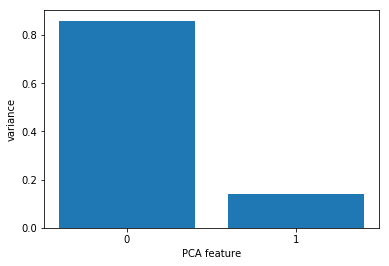

In [24]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
# sprawdzenie która zmienna ma największą wariancje

# Zad
Wygenerujmy dane z rozkładu normalnego z 5 zmiennymi gdzie dwie pary są silnie skorelowane.

Jak wyznaczyć liczbę ważnych składowych?


In [25]:
s = np.diag([1.]*5)
s[[0,1,3,4],[1,0,4,3]] = 0.98
print(s)
x = np.random.multivariate_normal([0]*5,s,200)
# pierwsza zmienna zalezna z drugą oraz czwarta z piata

[[1.   0.98 0.   0.   0.  ]
 [0.98 1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   1.   0.98]
 [0.   0.   0.   0.98 1.  ]]


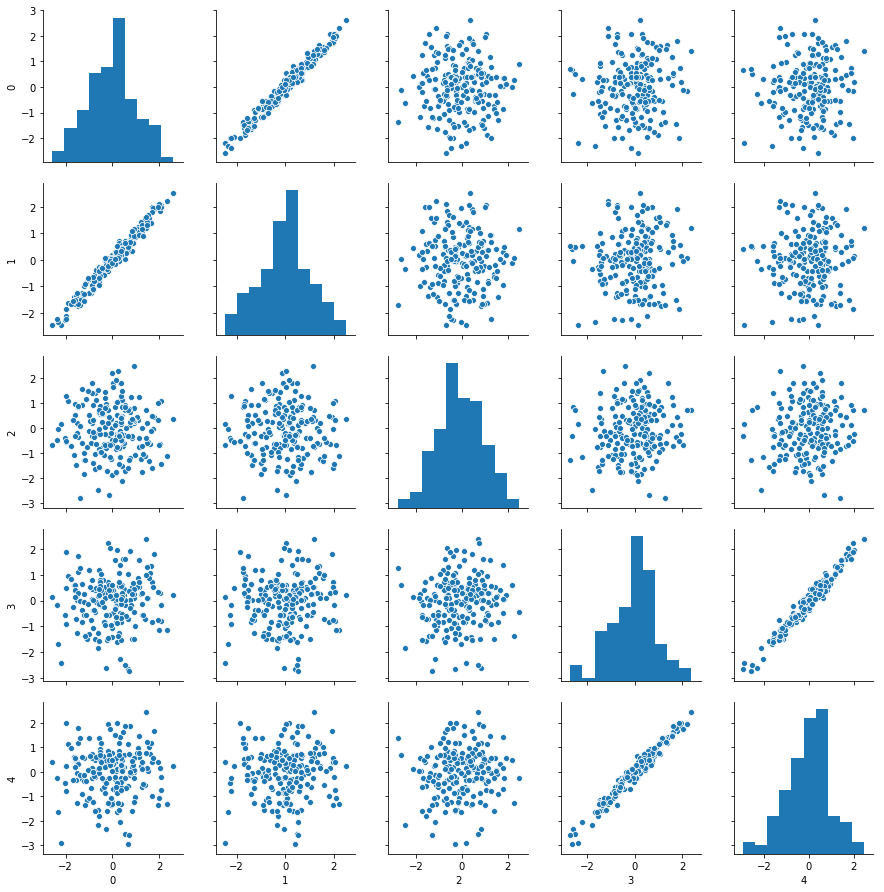

In [26]:
df=pd.DataFrame(x)
sns.pairplot(df)
plt.show()

In [27]:
pca = PCA()
pca.fit(x)
# nie podajemy narazie ile komponentów, bierzemy max

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_.shape

(5, 5)

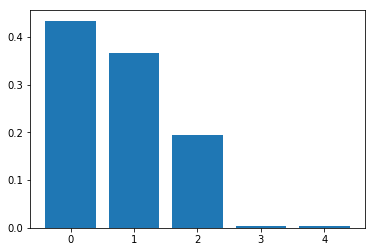

In [29]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()
# tutaj pierwsza wspolrzedna to nie jest pierwsza wspolrzedna oryginalnego zbioru danych!!
# to jest pierwsza wspolrzedna zbioru po transformacji!!
# tutaj jedna wspolrzedna może być już zmieszaniem np. pierwszej i trzeciej wspolrzedej z oryginalnego zbioru

# Oczywiście 3

In [30]:
#  testowo zostawiam 5 wymiarow, na danych widać że zbior sie rozjechał
x_pca = pca.transform(x)

In [31]:
df=pd.DataFrame(x_pca)
sns.pairplot(df)
plt.show()

In [32]:
# redukujemy do przestrzeni 3 wymiarów
pca = PCA(n_components=3)
x_pca_3 = pca.fit_transform(x)

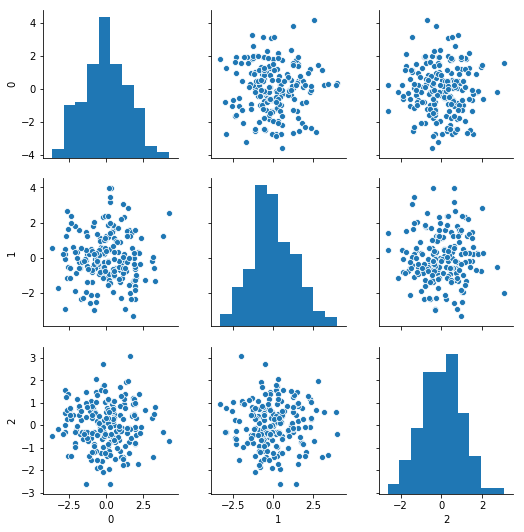

In [33]:
df=pd.DataFrame(x_pca_3)
sns.pairplot(df)
plt.show()